In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

from skeletonize import skeletonize
import cv2

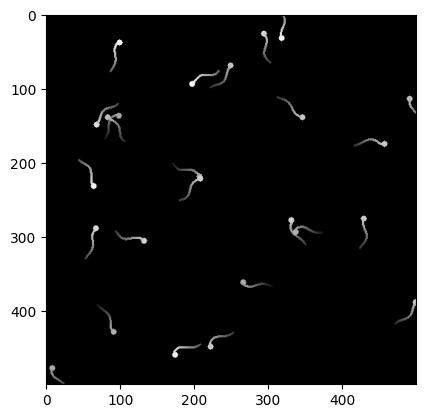

In [9]:
videofile = "ExampleVideos/NJITsynthetic1.mp4"

frames = utils.loadVideo(videofile)

# Get the first frame
frame = frames[18]

plt.imshow(frame)

/var/folders/1h/phzg991d7bn15bphmc87wt680000gp/T/ipykernel_25228/306565298.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('hsv', 10)
/var/folders/1h/phzg991d7bn15bphmc87wt680000gp/T/ipykernel_25228/306565298.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(s[i][:,1], s[i][:,0], s=0.1, c=colors(i))


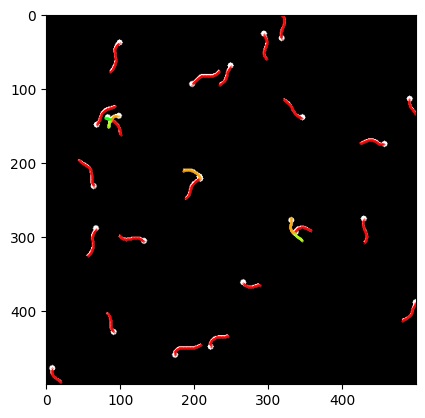

In [10]:
bw = tracker.threshold(frame)

num_labels, label_im, stats, _ = cv2.connectedComponentsWithStats(bw, 4, cv2.CV_32S)

skel = skeletonize()

all_skeletons = []

for i in range(1, num_labels):
    component = (label_im == i).astype(np.uint8)
    s = skel.skeleton(component)
    all_skeletons.append(s)

plt.imshow(bw, cmap='gray')

colors = plt.cm.get_cmap('hsv', 10)

for s in all_skeletons:
    for i in range(len(s)):
        plt.scatter(s[i][:,1], s[i][:,0], s=0.1, c=colors(i))
plt.show()



### Feed through the tracking pipeline

In [ ]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

print(t.head())

In [ ]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.computeAllStats(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [ ]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="segments")